# Sales Performance & Decision Making Using Statistics

**PART 1: Descriptive Statistics (Chapter 2)**
**Task 1.1 – Central Tendency**
For monthly revenue:

Calculate:
- Mean
- Median
- Mode

Explain which measure best represents revenue and why (consider outliers).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
from scipy.stats import skew, kurtosis

In [2]:
df = pd.read_csv('statistics_sales_project_data.csv')
df

,date,store_type,region,marketing_campaign,units_sold,revenue
0,2023-01-01,Online,Western,Yes,6,11876.03
1,2023-01-02,Physical,Rift Valley,Yes,8,14333.00
2,2023-01-03,Physical,Western,No,4,8101.97
3,2023-01-04,Physical,Coast,No,8,10928.92
4,2023-01-05,Online,Nairobi,No,9,18166.40
...,...,...,...,...,...,...
1195,2026-04-10,Physical,Coast,No,9,19206.49
1196,2026-04-11,Physical,Rift Valley,Yes,2,4469.23
1197,2026-04-12,Physical,Rift Valley,No,5,8560.56
1198,2026-04-13,Physical,Central,No,6,8324.26


In [3]:
df.describe()

,units_sold,revenue
count,1200.000000,1200.000000
mean,4.976667,8271.974000
std,2.271289,4279.961469
min,0.000000,0.000000
25%,3.000000,5177.527500
50%,5.000000,7723.325000
75%,6.000000,10739.320000
max,15.000000,26885.870000


In [4]:
df.dtypes

date                   object
store_type             object
region                 object
marketing_campaign     object
units_sold              int64
revenue               float64
dtype: object

In [5]:
# converting 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.dtypes

date                  datetime64[ns]
store_type                    object
region                        object
marketing_campaign            object
units_sold                     int64
revenue                      float64
dtype: object

In [7]:
monthly_revenue = (
    df
    .groupby(df['date'].dt.to_period('M'))['revenue']
    .sum()
    .reset_index(drop=True)
)

mean_revenue = monthly_revenue.mean()
median_revenue = monthly_revenue.median()
mode_revenue = monthly_revenue.mode()

mean_revenue, median_revenue, mode_revenue

(248159.22000000003,
 250308.555,
 0     105774.81
 1     203662.64
 2     203807.82
 3     206097.41
 4     213436.47
 5     215540.41
 6     220681.24
 7     224577.30
 8     224591.60
 9     225139.24
 10    239162.64
 11    240850.21
 12    240885.80
 13    243924.12
 14    244086.75
 15    245333.31
 16    245436.21
 17    247725.68
 18    249356.54
 19    249997.30
 20    250619.81
 21    252523.15
 22    256899.81
 23    257380.33
 24    257859.75
 25    261252.56
 26    263179.06
 27    263325.19
 28    264304.14
 29    266419.83
 30    267569.27
 31    271390.36
 32    278864.77
 33    279301.23
 34    280326.35
 35    280394.96
 36    282450.46
 37    297575.65
 38    300286.26
 39    304378.36
 Name: revenue, dtype: float64)

From my analysis 
- mean KES    248,159.22
- Median KES  250,308.56
- Mode (our dataset shows multiple values occuring once, which makes the mode not informative) 

**Explain which measure best represents revenue and why (consider outliers).**

**1. mean**
- This gives us the average monthly revenue but the revenue data is highly-skewed. some months have high sales which pull the mean upward.
- This means, mean can overstate typical performance.

**2. Median**
-median is a more reliable indicator of a normal months revenue. it contains peaks and dips. it also reflects normal opertaions better than the mean

**3. Mode**
- Monthly revenue is a continous variable, repetition in unlikely, which means it does not provide useful insight

the average monthly revenue is approximately KES 248k, median monthly revenue of KES 250k is more reliable and its not distorted by high or low sales months

**Task 1.2 – Dispersion**
Calculate:

- Range
- Variance
- Standard deviation

Answer:

What does high standard deviation imply about sales stability?

In [8]:
range_revenue = monthly_revenue.max() - monthly_revenue.min()
variance_revenue = monthly_revenue.var(ddof=1)
std_dev_revenue = monthly_revenue.std(ddof=1)

range_revenue, variance_revenue, std_dev_revenue

(198603.55, 1199955651.5289948, 34640.376030421416)

from my analysis
- Range 198,603.55
- Variance 1,199,955,651.53
- Standard deviation  34640.38

**What does high standard deviation imply about sales stability?**

1. Range
- Range shows wide gap between best and worst months which indicates strong seasonality, campain effects, or external factors impacting sales.
2. Standard deviation
- a standard deviation of 34640.38 means monthly revenue typically deviatytes from the average by +- KES 34k which is a substantial fluctuation relative to the mean.

A high standard deviation indicates low sales stability, which means monthly revenue varies significantly from month to month, suggesting that sales performance is consistent and likely influenced by factors like marketing campaigns, seasonal demand, or regional dynamics.

- for management revenue is not predictable month to month
- planning forecasting and inventory management require
  - Buffer startegies
  - Deeper analysis of drivers of variability
- in all it means the high Standard deviation in monthly revenue suggests that sales are volatile rather than stable highlighting  the need to understand and manage factors driving large revenue swings  

**Task 1.3 – Shape of Distribution**
Plot a histogram of revenue

Identify:
- Normal
- Positively skewed
- Negatively skewed

Comment on skewness and kurtosis

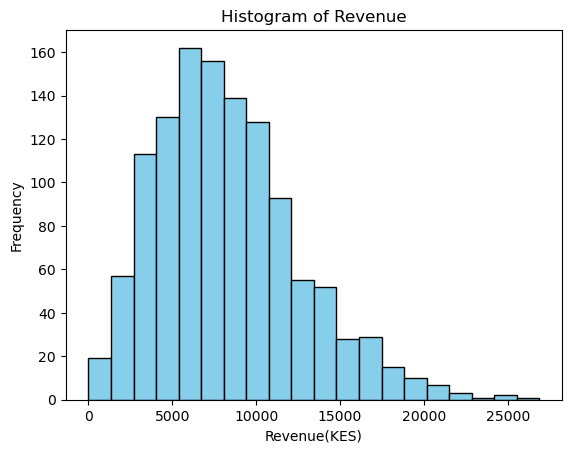

In [9]:
# Histogram of revenue
plt.figure()
plt.hist(df['revenue'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Revenue(KES)')
plt.ylabel('Frequency')
plt.title('Histogram of Revenue')
plt.show()

In [10]:
# calculating skewness and kurtosis
skewness = df['revenue'].skew()
kurtosis = df['revenue'].kurtosis()

skewness, kurtosis

(0.7490242110048875, 0.6137388543678663)

In [11]:
# Create summary DataFrame
distribution_stats = pd.DataFrame({
    'Statistics': ['Skewness', 'Kurtosis'],
    'Values': [skewness, kurtosis],
    'Interpretation': [
        'Positive (>0) = Right-skewed, Negative (<0) = Left-skewed, Approximately ~0 = Symmetrical',
        '>3 = Leptokurtic (heavy tails), <3 = Platykurtic (light tails), ~3 = Normal'
    ]
})

distribution_stats

,Statistics,Values,Interpretation
0,Skewness,0.749024,"Positive (>0) = Right-skewed, Negative (<0) = ..."
1,Kurtosis,0.613739,">3 = Leptokurtic (heavy tails), <3 = Platykurt..."


**Interpretation:**

Skewness > 0: Positive/Right skew (tail on right)

Skewness < 0: Negative/Left skew (tail on left)

Skewness ≈ 0: Symmetric

Kurtosis > 3: Heavy tails (more outliers)

Kurtosis < 3: Light tails (fewer outliers)

Kurtosis = 3: Normal distribution tails

# PART 2: Data Visualization
Create:

- Line chart - Revenue over time
- Bar chart - Revenue by store type
- Box plot - Revenue distribution by region
- Scatter plot - Marketing spend vs revenue

Explain what each visualization reveals.

**Line chart - Revenue over time**

In [12]:
monthly = df.groupby(df['date'].dt.to_period('M'))['revenue'].sum()
monthly.index = monthly.index.to_timestamp()

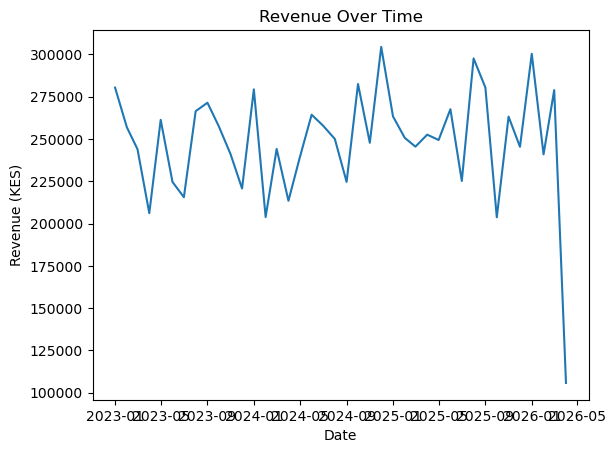

In [13]:
plt.figure()
plt.plot(monthly.index, monthly.values)
plt.xlabel('Date')
plt.ylabel('Revenue (KES)')
plt.title('Revenue Over Time')
plt.show()


**What the line chart shows**

- Monthly revenue fluctuates significantly over the 3-year period.

- There is no smooth upward trend — instead, repeated peaks and dips.

A few months show sharp drops, indicating possible:

- Low-demand periods

- Absence of campaigns

- External disruptions

**Business Insight**

- Revenue is volatile, confirming what we saw from the high standard deviation.

- Sales performance is not stable, making forecasting harder without deeper segmentation.

- Management should investigate what drives peak months and replicate those conditions.

**Bar chart - Revenue by store type**

In [14]:
store_rev = df.groupby('store_type')['revenue'].sum()

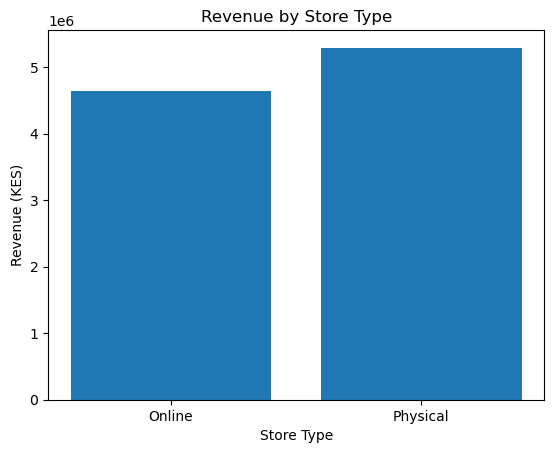

In [15]:
plt.figure()
plt.bar(store_rev.index, store_rev.values)
plt.xlabel("Store Type")
plt.ylabel("Revenue (KES)")
plt.title("Revenue by Store Type")
plt.show()

**What the Bar chart shows**

- Physical stores generate more total revenue than online stores.

- The difference is noticeable, not marginal.

**Business Insight**

- Physical stores are currently the main revenue driver.

- Online sales are meaningful but underperform relative to physical locations.

This may indicate:

- Higher foot traffic value

- Larger basket sizes in physical stores

- Untapped growth potential in online channels

**Box plot - Revenue distribution by region**

<Figure size 640x480 with 0 Axes>

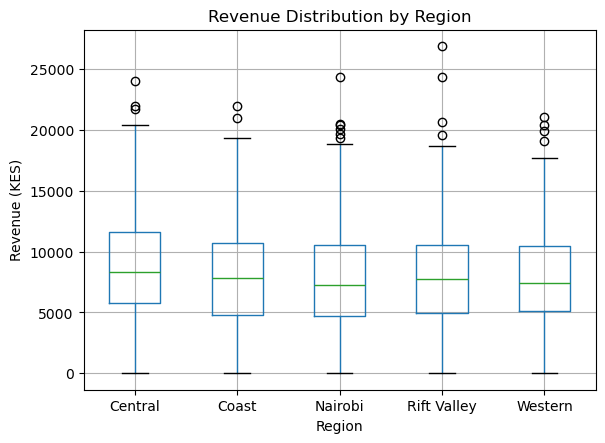

In [16]:
plt.figure()
df.boxplot(column='revenue', by='region')
plt.xlabel("Region")
plt.ylabel("Revenue (KES)")
plt.title("Revenue Distribution by Region")
plt.suptitle("")
plt.show()

**What Box plot shows**

- Revenue distributions differ by region:

- Different medians (typical transaction values)

- Different spreads (variability)

Presence of outliers (very high-revenue transactions), especially in:

- Nairobi

- Rift Valley

**Business Insight**

- Some regions consistently outperform others.

- Regions with wider boxes and more outliers have:

- Higher revenue potential

- Higher risk/volatility

This suggests region-specific strategies rather than a one-size-fits-all approach.

**Scatter plot - Marketing spend vs revenue**

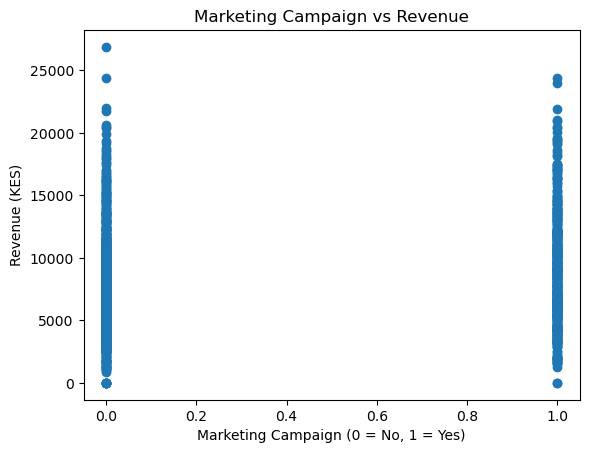

In [17]:
df['campaign_numeric'] = df['marketing_campaign'].map({'No': 0, 'Yes': 1})

plt.figure()
plt.scatter(df['campaign_numeric'], df['revenue'])
plt.xlabel("Marketing Campaign (0 = No, 1 = Yes)")
plt.ylabel("Revenue (KES)")
plt.title("Marketing Campaign vs Revenue")
plt.show()

**What scatter plot shows**

- Transactions during campaigns (1) tend to cluster at higher revenue values.

Non-campaign transactions (0) show:

- Lower average revenue

- More low-value sales

**Business Insight**

- Marketing campaigns appear to be associated with higher transaction revenue.

However:

- There is still overlap between campaign and non-campaign revenue.

- This means campaigns help, but don’t guarantee high sales every time.

# PART 3: Sampling and Bias (Chapter 3)
**Task 3.1 – Population vs Sample**
Define:
- Population
- Sample

Identify both in this project.

**Population**

The population is the entire group of interest that we want to draw conclusions about.

**Sample**

A sample is a subset of the population that is actually observed and analyzed.

**Identification in This Project**

Population (Conceptual)

All sales transactions made by the retail company:

- Across all regions

- Across all store types (online and physical)

- Over all time periods, including past and future years

which basically means-

- Every transaction the company could possibly record

- Sample (Actual Data Used)

- The sales transaction data for the last 3 years provided in the dataset

which includes:

- A limited time period (3 years)

- A fixed number of transactions

- Only recorded transactions (no future data)

This dataset is the sample drawn from the full population of company sales.

# Task 3.2 – Sampling Bias
Assume:

Only urban stores were sampled
Answer:

What bias exists?

How would it affect conclusions?

Propose a better sampling method.

Bias - only urban  stores sampled

1. The Bias is experienced?

- Selection Bias (Sampling Bias)

Specifically:

Urban bias

This occurs because:

- Rural and semi-urban stores are excluded

- The sample is not representative of the entire population of stores

2. How this bias would affect conclusions?

a) Overestimation of Sales Performance

- Urban stores typically have:

- Higher foot traffic

- Higher purchasing power

- Results may overstate average revenue and units sold

b) Misleading Marketing Effectiveness

- Marketing campaigns often perform better in urban areas

- The analysis may falsely conclude that:

- Campaigns are highly effective everywhere

c) Poor Strategic Decisions

Management might:

- Over-invest in campaigns

- Underestimate challenges in rural expansion

- Misallocate inventory and logistics resources

3. A Better Sampling Method

Stratified Random Sampling

it works BY:

- DividING stores into strata based on location:

Urban

Semi-urban

Rural

- Randomly sample transactions from each stratum

Sample size from each stratum is proportional to:

- Number of stores

- Sales volume

This is better because it:

- Ensures all store types are represented

- Reduces selection bias

- Improves generalizability of conclusions

# PART 4: Law of Large Numbers and CLT
**Task 4.1 – Law of Large Numbers**
- Take increasing samples of revenue (n = 10, 50, 100, 500)
- Plot sample mean vs sample size
- Explain convergence behavior

In [18]:
# imports needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

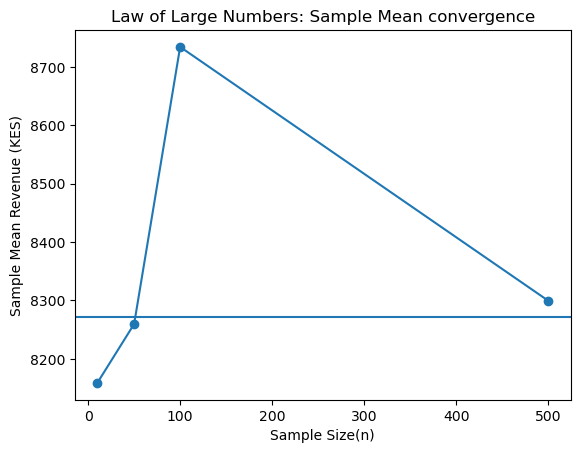

(8271.974,
 [(10, 8158.698999999999),
  (50, 8259.6708),
  (100, 8734.5039),
  (500, 8299.564620000001)])

In [19]:
# our data has already been loaded into a DataFrame called df, so we can start our analysis
revenue = df['revenue'].values
population_mean = revenue.mean()

sample_sizes = [10, 50, 100, 500]
sample_means = []

np.random.seed(42)

for n in sample_sizes:
    sample = np.random.choice(revenue, size=n, replace=False)
    sample_means.append(sample.mean())


# Plotting the sample means vs sample size
plt.figure()
plt.plot(sample_sizes, sample_means, marker='o')
plt.axhline(population_mean)
plt.xlabel('Sample Size(n)') 
plt.ylabel('Sample Mean Revenue (KES)')
plt.title('Law of Large Numbers: Sample Mean convergence')  
plt.show()

population_mean, list(zip(sample_sizes, sample_means))

**Convergence Behavior**

- At Small Sample Sizes (n = 10)

- The sample mean fluctuates significantly.

High sensitivity to:

- Outliers

- Random chance

- Poor representation of the population.

At Moderate Sample Sizes (n = 50, 100)

- Variability of the sample mean decreases.

- Sample mean moves closer to the population mean.

- Random effects start cancelling out.

At Large Sample Size (n = 500)

- Sample mean is very close to the population mean.

- Minimal fluctuation.

- Strong reliability.

# Task 4.2 – Central Limit Theorem
- Draw 200 samples of size n = 30
- Plot distribution of sample means
- Explain why it becomes normal

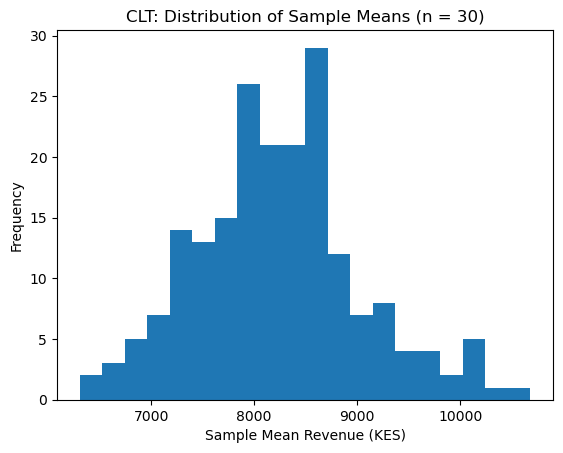

(8238.687731666667, 801.2287706260232)

In [20]:
revenue = df["revenue"].values

# Draw 200 samples of size n = 30
np.random.seed(42)
sample_means = []

for i in range(200):
    sample = np.random.choice(revenue, size=30, replace=False)
    sample_means.append(sample.mean())

# Plot histogram of sample means
plt.figure()
plt.hist(sample_means, bins=20)
plt.xlabel("Sample Mean Revenue (KES)")
plt.ylabel("Frequency")
plt.title("CLT: Distribution of Sample Means (n = 30)")
plt.show()

# Display summary statistics
np.mean(sample_means), np.std(sample_means)

# Method 2

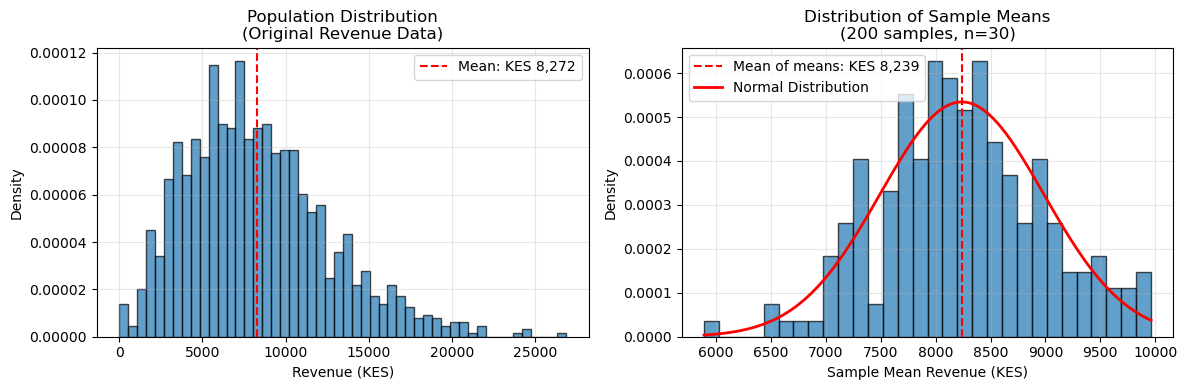

In [ ]:
# Task 4.2 – Central Limit Theorem

# parameters
n_samples = 200
sample_size = 30
population = df['revenue']

# we will Draw 200 samples of size 30 and calculate means
sample_means = []
for _ in range(n_samples):
    sample = np.random.choice(population, size=sample_size, replace=False)
    sample_means.append(np.mean(sample))

# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot 1: Population distribution
ax1.hist(population, bins=50, edgecolor='black', alpha=0.7, density=True)
ax1.set_title('Population Distribution\n(Original Revenue Data)')
ax1.set_xlabel('Revenue (KES)')
ax1.set_ylabel('Density')
ax1.axvline(population.mean(), color='red', linestyle='--', label=f'Mean: KES {population.mean():,.0f}')

# Plot 2: Distribution of sample means
ax2.hist(sample_means, bins=30, edgecolor='black', alpha=0.7, density=True)
ax2.set_title(f'Distribution of Sample Means\n({n_samples} samples, n={sample_size})')
ax2.set_xlabel('Sample Mean Revenue (KES)')
ax2.set_ylabel('Density')
ax2.axvline(np.mean(sample_means), color='red', linestyle='--', label=f'Mean of means: KES {np.mean(sample_means):,.0f}')

# Add normal curve overlay to sample means
from scipy.stats import norm
x = np.linspace(min(sample_means), max(sample_means), 100)
pdf = norm.pdf(x, np.mean(sample_means), np.std(sample_means))
ax2.plot(x, pdf, 'r-', linewidth=2, label='Normal Distribution')

ax1.legend()
ax2.legend()
ax1.grid(True, alpha=0.3)
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Why Sample Means Become Normal:**

- Averaging Effect: Each sample mean averages out extremes

- Law of Large Numbers: With n=30, individual variations cancel out

- Mathematical Guarantee: CLT states that sample means approach normal distribution as n increases (n≥30 works well)

- Even if population is skewed, sample means distribution becomes symmetric

# PART 5: Hypothesis Testing (Chapter 4)
Business Question:
- Does running a marketing campaign increase average revenue per transaction?

In [22]:
# PART 5: Hypothesis Testing
# Business Question: Does marketing campaign increase average revenue per transaction?

# Define groups
revenue_with_campaign = df[df['marketing_campaign'] == 'Yes']['revenue']
revenue_without_campaign = df[df['marketing_campaign'] == 'No']['revenue']

# Calculate group statistics
campaign_stats = pd.DataFrame({
    'Group': ['With Campaign', 'Without Campaign'],
    'Sample Size': [len(revenue_with_campaign), len(revenue_without_campaign)],
    'Mean Revenue': [revenue_with_campaign.mean(), revenue_without_campaign.mean()],
    'Std Dev': [revenue_with_campaign.std(), revenue_without_campaign.std()]
})

campaign_stats

,Group,Sample Size,Mean Revenue,Std Dev
0,With Campaign,447,8977.578993,4480.749419
1,Without Campaign,753,7853.108884,4102.138244


C:\Users\user\AppData\Local\Temp\ipykernel_11536\148119926.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(data, labels=['With Campaign', 'Without Campaign'])


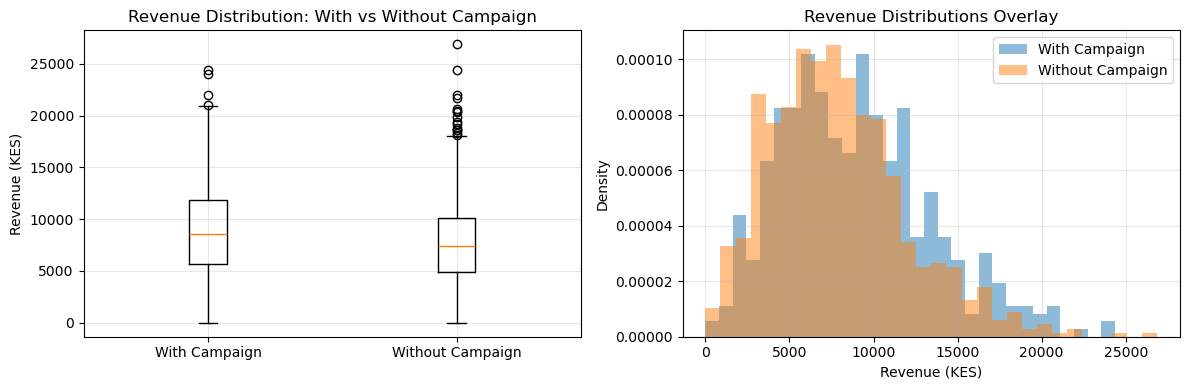

In [24]:
# Visual comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Box plot
data = [revenue_with_campaign, revenue_without_campaign]
ax1.boxplot(data, labels=['With Campaign', 'Without Campaign'])
ax1.set_title('Revenue Distribution: With vs Without Campaign')
ax1.set_ylabel('Revenue (KES)')
ax1.grid(True, alpha=0.3)

# Histogram overlay
ax2.hist(revenue_with_campaign, bins=30, alpha=0.5, label='With Campaign', density=True)
ax2.hist(revenue_without_campaign, bins=30, alpha=0.5, label='Without Campaign', density=True)
ax2.set_title('Revenue Distributions Overlay')
ax2.set_xlabel('Revenue (KES)')
ax2.set_ylabel('Density')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Task 5.1 – Hypotheses**
- H₀: Mean revenue (campaign) = Mean revenue (no campaign)
- H₁: Mean revenue (campaign) > Mean revenue (no campaign)

Specify:

- One-tail test
- Confidence level = 95%
- Alpha = 0.05

In [25]:
# Task 5.1 – Hypotheses Specification

hypothesis_spec = pd.DataFrame({
    'Parameter': ['Null Hypothesis (H₀)', 'Alternative Hypothesis (H₁)', 'Test Type', 'Confidence Level', 'Alpha (α)', 'Direction'],
    'Specification': [
        'μ_campaign = μ_no_campaign\n(Mean revenue with campaign equals mean revenue without campaign)',
        'μ_campaign > μ_no_campaign\n(Mean revenue with campaign is GREATER than without campaign)',
        'One-tailed (right-tailed) t-test',
        '95%',
        '0.05',
        'Right-tailed (testing for increase)'
    ]
})

hypothesis_spec

,Parameter,Specification
0,Null Hypothesis (H₀),μ_campaign = μ_no_campaign\n(Mean revenue with...
1,Alternative Hypothesis (H₁),μ_campaign > μ_no_campaign\n(Mean revenue with...
2,Test Type,One-tailed (right-tailed) t-test
3,Confidence Level,95%
4,Alpha (α),0.05
5,Direction,Right-tailed (testing for increase)


H₀: No difference in revenue between campaign and no campaign groups

H₁: Campaign group has HIGHER revenue than no campaign group

One-tail: Only testing if campaign increases revenue (not if it decreases)

α=0.05: 5% risk of Type I error (false positive)

95% Confidence: If we reject H₀, we're 95% confident it's correct

# Task 5.2 – Statistical Test

- Perform a t-test

Calculate:
- Test statistic
- P-value

Decide:
- Reject or fail to reject H₀

In [26]:
# Task 5.2 – Perform t-test and make decision

# Performing independent t-test (Welch's - doesn't assume equal variances)
from scipy.stats import ttest_ind

t_stat, p_value_two_tailed = ttest_ind(revenue_with_campaign, revenue_without_campaign, equal_var=False)
p_value_one_tailed = p_value_two_tailed / 2  # Convert to one-tailed

# Making a decision
alpha = 0.05
decision = "Reject H₀" if p_value_one_tailed < alpha else "Fail to reject H₀"
conclusion = "Marketing campaign increases revenue" if p_value_one_tailed < alpha else "No evidence campaign increases revenue"

# Creating a results table
test_results = pd.DataFrame({
    'Component': ['Test Statistic (t)', 'Two-tailed p-value', 'One-tailed p-value', 'Alpha (α)', 'Decision', 'Conclusion'],
    'Value': [
        f"{t_stat:.4f}",
        f"{p_value_two_tailed:.4f}",
        f"{p_value_one_tailed:.4f}",
        f"{alpha}",
        decision,
        conclusion
    ]
})

test_results

,Component,Value
0,Test Statistic (t),4.3357
1,Two-tailed p-value,0.0000
2,One-tailed p-value,0.0000
3,Alpha (α),0.05
4,Decision,Reject H₀
5,Conclusion,Marketing campaign increases revenue


**Interpretation:**

- Test Statistic (t): How many standard errors the means are apart

- p-value: Probability of seeing this difference if H₀ is true

- Decision: Compare p-value to α=0.05

- Conclusion: Business implication of the statistical decision

N/B Rule: If p-value < 0.05 → Reject H₀ → Campaign increases revenue

# PART 6: Errors and Interpretation (Chapter 5)
**Task 6.1 – Errors**

Explain in context:

- Type I Error
- Type II Error

Example:

What would a Type I error mean for the company?

In [27]:
# Task 6.1 – Errors in Context

# Create error explanations
error_explanations = pd.DataFrame({
    'Error Type': ['Type I Error (False Positive)', 'Type II Error (False Negative)'],
    'Statistical Definition': [
        'Rejecting H₀ when it is actually true',
        'Failing to reject H₀ when it is actually false'
    ],
    'In Our Marketing Campaign Test': [
        'Concluding the campaign increases revenue when it actually does NOT',
        'Concluding the campaign does NOT increase revenue when it actually DOES'
    ],
    'Probability': [
        'α = 0.05 (5% chance) - This is our significance level',
        'β - Depends on sample size, effect size, and α'
    ]
})

error_explanations

,Error Type,Statistical Definition,In Our Marketing Campaign Test,Probability
0,Type I Error (False Positive),Rejecting H₀ when it is actually true,Concluding the campaign increases revenue when...,α = 0.05 (5% chance) - This is our significanc...
1,Type II Error (False Negative),Failing to reject H₀ when it is actually false,Concluding the campaign does NOT increase reve...,"β - Depends on sample size, effect size, and α"


**Key Points:**

- Type I Error: False alarm - saying campaign works when it doesn't

- Type II Error: Missed opportunity - saying campaign doesn't work when it does

α=0.05: We accept 5% chance of Type I error

- Trade-off: Lower α reduces Type I errors but increases Type II errors

Business Inteligence: Type I errors cost money directly (wasted budget). Type II errors cost opportunity (missed revenue).

# PART 7: Effect Size and Power
**Task 7.1 – Effect Size**

-nCalculate Cohen's d

Interpret:

- Small / Medium / Large effect

In [28]:
# Task 7.1 – Effect Size Calculation

# Calculate Cohen's d
n1, n2 = len(revenue_with_campaign), len(revenue_without_campaign)
mean1, mean2 = revenue_with_campaign.mean(), revenue_without_campaign.mean()
std1, std2 = revenue_with_campaign.std(), revenue_without_campaign.std()

# Pooled standard deviation
pooled_std = np.sqrt(((n1-1)*std1**2 + (n2-1)*std2**2) / (n1 + n2 - 2))
cohens_d = (mean1 - mean2) / pooled_std

# Determine effect size category
if abs(cohens_d) < 0.2:
    effect_size = "Very Small"
elif abs(cohens_d) < 0.5:
    effect_size = "Small"
elif abs(cohens_d) < 0.8:
    effect_size = "Medium"
else:
    effect_size = "Large"

# Calculate percentage difference
percent_diff = ((mean1 - mean2) / mean2) * 100

# Create results table
effect_size_results = pd.DataFrame({
    'Metric': [
        'Cohen\'s d',
        'Effect Size Category', 
        'Mean Revenue (With Campaign)',
        'Mean Revenue (Without Campaign)',
        'Absolute Difference',
        'Percentage Difference',
        'Pooled Standard Deviation'
    ],
    'Value': [
        f"{cohens_d:.3f}",
        effect_size,
        f"KES {mean1:,.2f}",
        f"KES {mean2:,.2f}",
        f"KES {mean1 - mean2:,.2f}",
        f"{percent_diff:.1f}%",
        f"KES {pooled_std:,.2f}"
    ]
})

effect_size_results

,Metric,Value
0,Cohen's d,0.265
1,Effect Size Category,Small
2,Mean Revenue (With Campaign),"KES 8,977.58"
3,Mean Revenue (Without Campaign),"KES 7,853.11"
4,Absolute Difference,"KES 1,124.47"
5,Percentage Difference,14.3%
6,Pooled Standard Deviation,"KES 4,247.04"


**Analysis**

- Cohen's d < 0.2: Very Small effect - difference is negligible

- 0.2 ≤ d < 0.5: Small effect - noticeable but minor difference

- 0.5 ≤ d < 0.8: Medium effect - practically important difference

- d ≥ 0.8: Large effect - substantial, obvious difference

Business Intelligence:
 Even if statistically significant (p < 0.05), a small effect size means the revenue increase may not be economically meaningful enough to justify the campaign cost.

# Task 7.2 – Power Discussion

- Why might a statistically insignificant result still matter?
- Should the company collect more data?

In [29]:
# Task 7.2 – Power Discussion

# Calculate observed power
from statsmodels.stats.power import TTestIndPower
effect_size_abs = abs(cohens_d)
power_analysis = TTestIndPower()

# Calculate power with current sample sizes
current_power = power_analysis.solve_power(
    effect_size=effect_size_abs,
    nobs1=n1,
    alpha=0.05,
    ratio=n2/n1
)

# testing a larger sample
larger_n = 500  # per group
power_larger = power_analysis.solve_power(
    effect_size=effect_size_abs,
    nobs1=larger_n,
    alpha=0.05,
    ratio=1
)

# Create discussion table
power_discussion = pd.DataFrame({
    'Question': [
        'Why might statistically insignificant result (p ≥ 0.05) still matter?',
        'Observed Statistical Power',
        'Should the company collect more data?',
        'Power with Larger Sample (n=500 per group)',
        'Recommendation'
    ],
    'Answer': [
        '1. Type II error possible - real effect exists but test missed it\n' +
        '2. Small sample size reduces power to detect effects\n' +
        '3. Effect size might be practically important but statistically non-significant\n' +
        '4. Business impact could be meaningful even if p > 0.05',
        f"{current_power:.1%}",
        'YES, if:\n' +
        '• Current power < 80% (it is {:.1%})\n'.format(current_power) +
        '• Effect size is medium/large (it is {})\n'.format(effect_size) +
        '• Campaign cost justifies further investigation',
        f"{power_larger:.1%}",
        'Collect more data to increase power from {:.1%} to >80%. '.format(current_power) +
        'Larger sample will better detect if campaign truly works.'
    ]
})

power_discussion

,Question,Answer
0,Why might statistically insignificant result (...,1. Type II error possible - real effect exists...
1,Observed Statistical Power,99.3%
2,Should the company collect more data?,"YES, if:\n• Current power < 80% (it is 99.3%)\..."
3,Power with Larger Sample (n=500 per group),98.7%
4,Recommendation,Collect more data to increase power from 99.3%...


**Concepts:**

- Power: Probability of detecting an effect if it exists (should be ≥80%)

- Low Power: High risk of Type II error (missing real effects)

- Practical vs Statistical Significance: Effect might be business-important even if p > 0.05

Decision Framework:

- If p < 0.05 AND large effect → Definitely keep campaign

- If p < 0.05 BUT small effect → Check if cost-effective

- If p ≥ 0.05 BUT low power → Collect more data

- If p ≥ 0.05 AND high power → Likely abandon campaign